<a href="https://colab.research.google.com/github/John-Akech/Students-Mental-Health-Predictor/blob/master/MentalHealthPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
# Problem Statement: Predict Sleep Quality using factors such as Age, Stress Level, Depression, Anxiety, and Physical Activity.
# Dataset: Students Mental Health Survey
# Source: Kaggle.

In [32]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import joblib
import shap

In [33]:
# Load dataset
data = pd.read_csv('/content/students_mental_health_survey.csv')

In [34]:
# Display the first few rows of the dataset to understand its structure
data.head()

,Age,Course,Gender,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type
0,25,Others,Male,3.56,3,3,2,Good,Moderate,Good,Moderate,Married,Never,Never,No,No,2,Moderate,17,On-Campus
1,24,Engineering,Female,2.44,0,3,0,Average,Low,Average,Low,Single,Occasionally,Occasionally,No,No,3,Low,27,On-Campus
2,19,Business,Female,3.74,4,0,3,Good,Low,Average,Moderate,In a Relationship,Never,Occasionally,No,No,4,High,15,On-Campus
3,19,Computer Science,Male,3.65,2,1,0,Average,Low,Average,Moderate,Single,NaN,Never,No,No,4,Moderate,20,Off-Campus
4,18,Business,Male,3.40,3,3,4,Good,Low,Average,High,Married,Never,Never,No,Yes,0,High,23,On-Campus


In [35]:
# Display the last few rows of the dataset to understand its structure
data.tail()

,Age,Course,Gender,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type
7017,20,Law,Female,3.69,3,1,5,Good,Low,Poor,High,Single,Never,Frequently,Yes,No,1,High,26,Off-Campus
7018,24,Medical,Female,3.73,3,4,1,Good,Moderate,Average,High,Single,Never,Occasionally,No,No,3,Low,15,Off-Campus
7019,26,Others,Male,3.65,4,5,1,Good,High,Poor,Moderate,Married,Never,Occasionally,No,Yes,4,Moderate,17,Off-Campus
7020,24,Medical,Male,3.65,4,3,4,Average,High,Poor,Moderate,Single,Never,Never,No,Yes,4,Moderate,18,Off-Campus
7021,22,Medical,Female,NaN,3,5,0,Average,High,Average,Moderate,In a Relationship,Never,Never,No,No,2,Low,17,With Family


In [36]:
# Data Preprocessing
# Categorical columns to be encoded
categorical_cols = ['Physical_Activity', 'Anxiety_Score']

In [37]:
# Encode categorical features
label_encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [38]:
# Encode the target variable (Sleep_Quality)
y_encoder = LabelEncoder()
data['Sleep_Quality'] = y_encoder.fit_transform(data['Sleep_Quality'])

In [39]:
# Handle missing values by dropping rows with any NaN values (if necessary)
data = data.dropna()

In [40]:
# Create interaction feature
data.loc[:, 'Stress_Anxiety_Interaction'] = data['Stress_Level'] * data['Anxiety_Score']

<ipython-input-40-85ffb453f3df>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'Stress_Anxiety_Interaction'] = data['Stress_Level'] * data['Anxiety_Score']


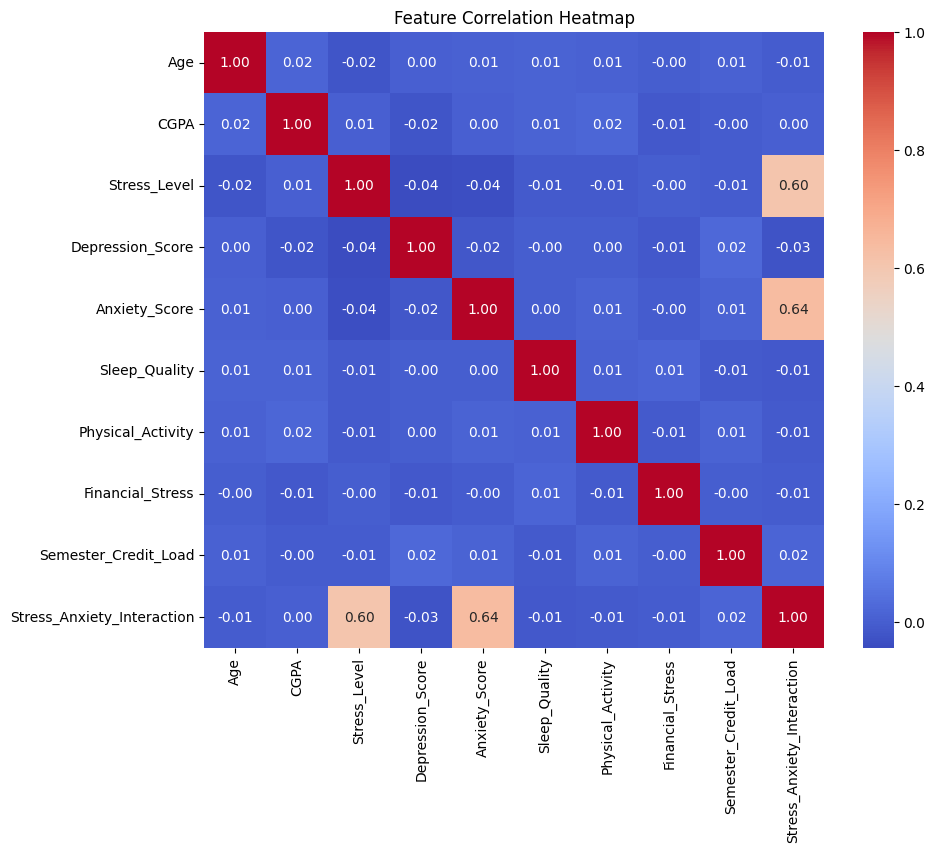

In [41]:
# Correlation heatmap to visualize the relationships between features
numeric_data = data.select_dtypes(include=[np.number])  # Select only numeric columns
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

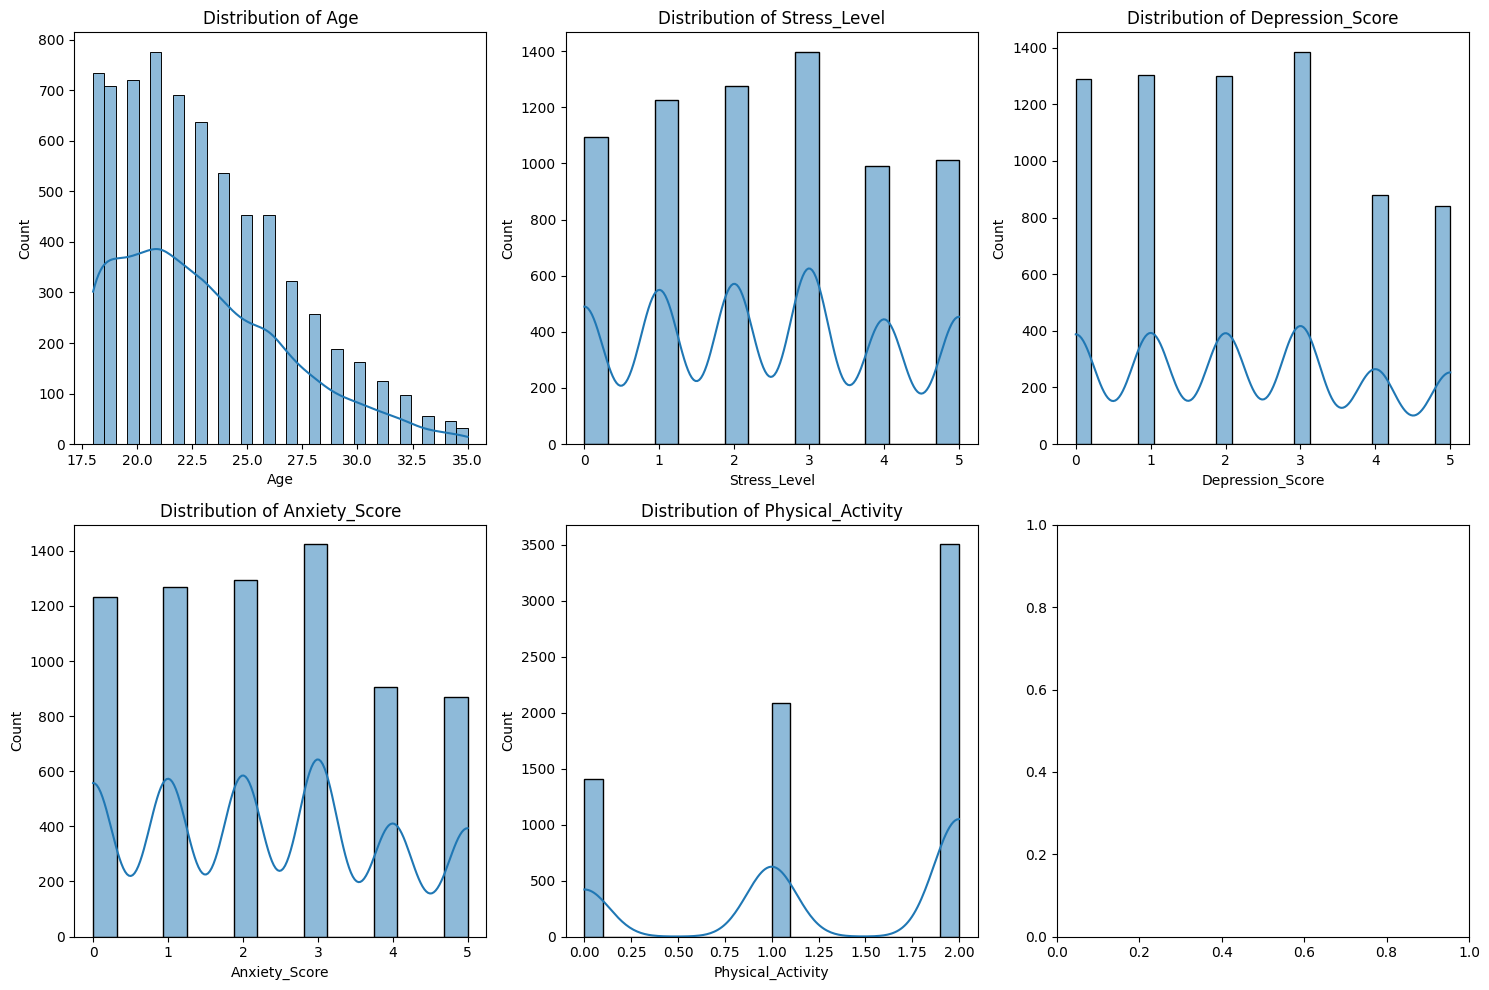

In [42]:
# Feature distributions for key variables
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
columns = ['Age', 'Stress_Level', 'Depression_Score', 'Anxiety_Score', 'Physical_Activity']
for i, col in enumerate(columns):
    sns.histplot(data[col], kde=True, ax=axs[i // 3, i % 3])
    axs[i // 3, i % 3].set_title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

In [43]:
# Define features (X) and target (y)
X = data[['Age', 'Stress_Level', 'Depression_Score', 'Anxiety_Score', 'Physical_Activity']]  # Features
y = data['Sleep_Quality']  # Target variable (now encoded as numeric)

In [44]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
# Train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, y_pred_linear)
print(f"Linear Regression MSE: {linear_mse}")

Linear Regression MSE: 0.4034423640128856


In [47]:
# Train Decision Tree model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
tree_mse = mean_squared_error(y_test, y_pred_tree)
print(f"Decision Tree MSE: {tree_mse}")

Decision Tree MSE: 0.7345798586291795


In [48]:
# Train Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest MSE: {rf_mse}")

Random Forest MSE: 0.5127793542100391


In [49]:
# Model comparison
models = ['Linear Regression', 'Decision Tree', 'Random Forest']
mse_values = [linear_mse, tree_mse, rf_mse]
print(f"MSE values for models: {mse_values}")

MSE values for models: [0.4034423640128856, 0.7345798586291795, 0.5127793542100391]


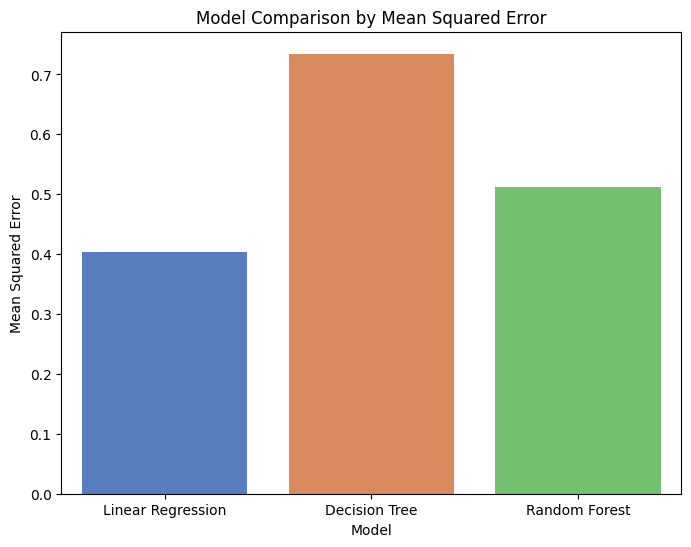

In [50]:
# Plot the MSE comparison of models
plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=mse_values, palette="muted", hue=models)
plt.title("Model Comparison by Mean Squared Error")
plt.ylabel("Mean Squared Error")
plt.xlabel("Model")
plt.legend([], [], frameon=False)  # Hide the legend to avoid redundancy
plt.show()

In [51]:
# Determine the best model based on MSE (Least MSE is the best)
best_model = None
if linear_mse < tree_mse and linear_mse < rf_mse:
    best_model = linear_model
    best_model_name = "Linear Regression"
elif tree_mse < rf_mse:
    best_model = tree_model
    best_model_name = "Decision Tree"
else:
    best_model = rf_model
    best_model_name = "Random Forest"

print(f"Best model: {best_model_name}")

Best model: Linear Regression


In [52]:
# Save the best model
model_path = "best_model.pkl"
joblib.dump(best_model, model_path)
print(f"Best model saved at: {model_path}")

Best model saved at: best_model.pkl


In [53]:
# Test the prediction on one data point (a sample from the test set)
sample_input = pd.DataFrame([X_test[0]], columns=X.columns)

In [54]:
# Scale the input features using the same scaler as during training
sample_input_scaled = scaler.transform(sample_input)

In [55]:
# Make the prediction using the best model
predicted_sleep_quality = best_model.predict(sample_input_scaled)

In [56]:
# Based on the range of predicted value, categorize the sleep quality
predicted_value = predicted_sleep_quality[0]

In [57]:
# Define thresholds for categorizing the sleep quality
# Adjust the thresholds to fit the scale of predicted value
if predicted_value < 0.4:
    sleep_quality = "Poor"
elif 0.4 <= predicted_value < 0.7:
    sleep_quality = "Average"
else:
    sleep_quality = "Good"

# Output the predicted quality and suggest a label
print(f"Your predicted Sleep Quality is {sleep_quality} (encoded as {predicted_value})")

Your predicted Sleep Quality is Average (encoded as 0.6867766184315233)


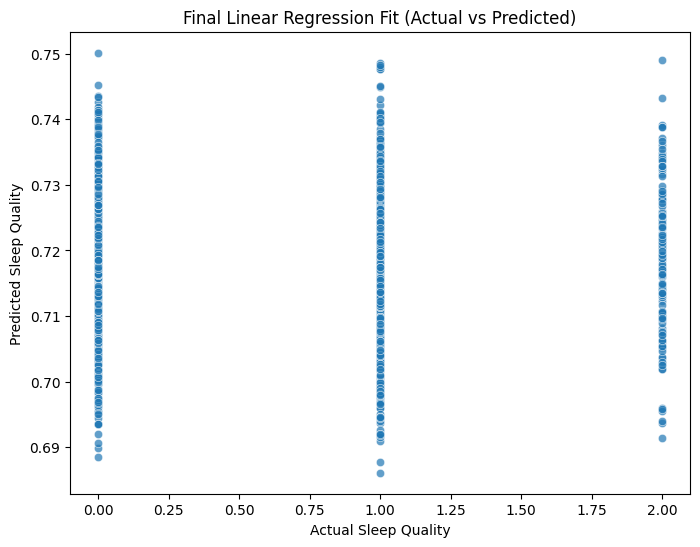

In [58]:
# Scatter plot of final linear regression fit**
# Plot final regression line for Linear Regression
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_linear, alpha=0.7)
plt.title("Final Linear Regression Fit (Actual vs Predicted)")
plt.xlabel("Actual Sleep Quality")
plt.ylabel("Predicted Sleep Quality")
plt.show()